In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
from self_learn import CustomLogisticRegression, BaymaxNet
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from utils import *

In [46]:
%store -r X_train
%store -r X_val
%store -r y_train
%store -r y_val

In [55]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20999, 20), (3720, 20), (20999,), (3720,))

In [48]:
tuned_params = {'regularization': 'L1', 
                'num_epochs': 1000, 
                'learning_rate': 0.1, 
                'lambda_reg': 0.001, 
                'gamma': 2.0, 
                'class_weights': [2.85176468, 7.36963696, 1.66483665]}

Epoch 0, Loss: 43222.557188214414, Train Accuracy: 0.20253345397399877, Val Accuracy: 0.1793010752688172
Epoch 5, Loss: 227867.14487267716, Train Accuracy: 0.7519405685985047, Val Accuracy: 0.7768817204301075
Epoch 10, Loss: 227867.12981419338, Train Accuracy: 0.7519405685985047, Val Accuracy: 0.7768817204301075
Epoch 15, Loss: 227867.14301351176, Train Accuracy: 0.7519405685985047, Val Accuracy: 0.7768817204301075
Epoch 20, Loss: 227867.08068404393, Train Accuracy: 0.7519405685985047, Val Accuracy: 0.7768817204301075
Epoch 25, Loss: 227273.14103892495, Train Accuracy: 0.27058431353873996, Val Accuracy: 0.25349462365591396
Epoch 30, Loss: 227867.2292719068, Train Accuracy: 0.7519881899138054, Val Accuracy: 0.7768817204301075
Epoch 35, Loss: 227867.19933549556, Train Accuracy: 0.7519405685985047, Val Accuracy: 0.7768817204301075
Epoch 40, Loss: 227748.3909348112, Train Accuracy: 0.6421734368303252, Val Accuracy: 0.6661290322580645
Epoch 45, Loss: 227867.18226108875, Train Accuracy: 0.75

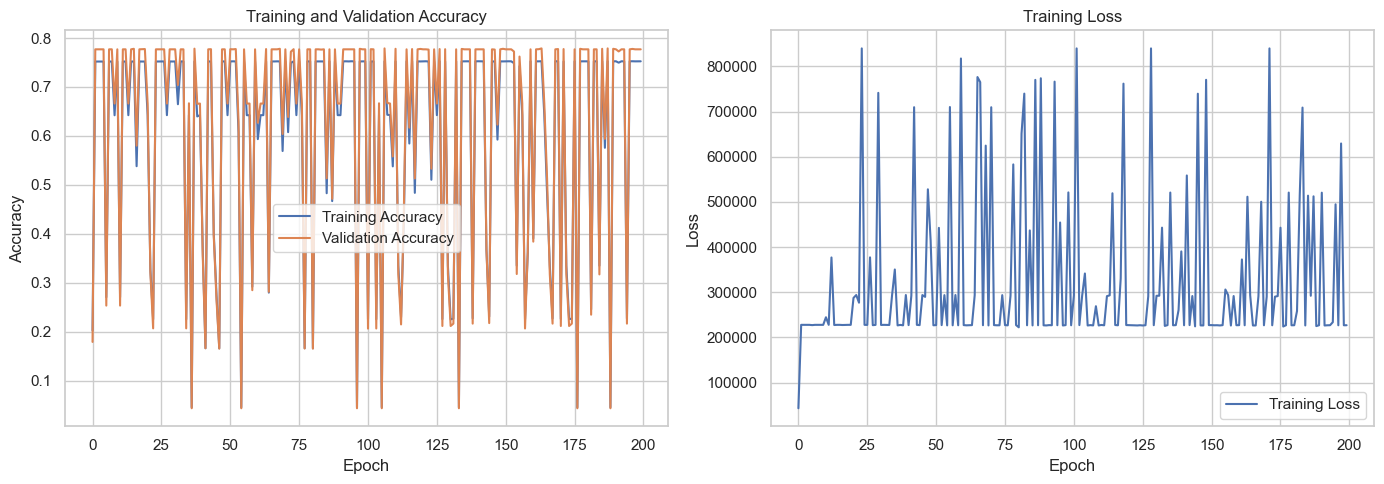

In [53]:
logreg = CustomLogisticRegression(num_epochs=tuned_params['num_epochs'],
                            learning_rate=tuned_params['learning_rate'],
                            regularization=tuned_params['regularization'], 
                            lambda_reg=tuned_params['lambda_reg'], 
                            gamma=tuned_params['gamma'],
                            validation=True,
                            class_weights=tuned_params['class_weights'],
                            #alpha = [0.08, 0.50, 0.1],
                            logging_notes="FE: Squared transformation, trigonometric temporal features, class weights, 2008-2010cv",
                            logging_tag="baseline_logreg",
                            verbose=0)
logreg.fit(X = X_train.values, 
          y = y_train.values,
          X_val = X_val.values,
          y_val = y_val.values)

In [9]:
y_pred = logreg.predict(X_val.values)
accuracy = (y_val == y_pred).mean()
print(np.unique(y_pred))
print(f'Accuracy: {accuracy:.2%}')

[0 1 2]
Accuracy: 79.38%


In [10]:
get_classification_report(y_val, y_pred)

1. The F-1 score of the model 0.5784190909734163

2. The recall score of the model 0.5818635622431211

3. Classification report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      2890
           1       0.35      0.50      0.42       163
           2       0.72      0.32      0.45       667

    accuracy                           0.79      3720
   macro avg       0.63      0.58      0.58      3720
weighted avg       0.79      0.79      0.78      3720
 

4. Confusion matrix 
 [[2655  150   85]
 [  81   82    0]
 [ 451    0  216]] 



## baymaxnet

In [42]:
def get_model_stats(model):
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = (y_val == y_pred).mean()
    print(np.unique(y_pred))
    print(f'Accuracy: {accuracy:.2%}')
    print(get_classification_report(y_val, y_pred))

In [39]:
model = BaymaxNet()
get_model_stats(model)

[0 1 2]
Accuracy: 78.44%
1. The F-1 score of the model 0.3737908264329002

2. The recall score of the model 0.3742806288069585

3. Classification report 
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      2890
           1       0.86      0.04      0.07       163
           2       0.60      0.10      0.17       667

    accuracy                           0.78      3720
   macro avg       0.75      0.37      0.37      3720
weighted avg       0.76      0.78      0.72      3720
 

4. Confusion matrix 
 [[2844    1   45]
 [ 157    6    0]
 [ 599    0   68]] 

None


In [37]:
rf = RandomForestClassifier(bootstrap = True, 
                            class_weight =None, 
                            criterion = 'gini',
                            max_depth = 39,
                            max_features = 3, 
                            min_samples_leaf = 0.011565806463177194,
                            min_samples_split = 0.017239740311285764, 
                            n_estimators = 811
                            )
get_model_stats(rf)

[0 2]
Accuracy: 77.69%
1. The F-1 score of the model 0.31008175833891277

2. The recall score of the model 0.3410215307571128

3. Classification report 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      2890
           1       0.00      0.00      0.00       163
           2       0.50      0.03      0.06       667

    accuracy                           0.78      3720
   macro avg       0.43      0.34      0.31      3720
weighted avg       0.70      0.78      0.69      3720
 

4. Confusion matrix 
 [[2870    0   20]
 [ 163    0    0]
 [ 647    0   20]] 

None


In [45]:
xgb = XGBClassifier(
    colsample_bytree = 0.9385812500707504,
    gamma = 0.188570709579355,
    learning_rate = 0.17,
    max_delta_step = 5,
    max_depth = 9,
    min_child_weight = 7, 
    n_estimators = 254, 
    reg_alpha = 0.2791453005653505,
    reg_lambda = 2.9636012865585113, 
    scale_pos_weight = 7.692974658470718, 
    subsample = 0.9514650766399473,
    objective = 'multi:softmax'
)
get_model_stats(xgb)

[0 1 2]
Accuracy: 80.73%
1. The F-1 score of the model 0.5110786427108328

2. The recall score of the model 0.46687707582301147

3. Classification report 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2890
           1       0.64      0.15      0.25       163
           2       0.69      0.28      0.40       667

    accuracy                           0.81      3720
   macro avg       0.72      0.47      0.51      3720
weighted avg       0.79      0.81      0.77      3720
 

4. Confusion matrix 
 [[2790   14   86]
 [ 138   25    0]
 [ 479    0  188]] 

None
